In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
bank = pd.read_csv('datasets/bank_data.csv')
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,34,9,180,93023,1,8.9,3,0,1,0,0,0,0
1,2,38,14,130,95010,4,4.7,3,134,1,0,0,0,0
2,3,46,21,193,91604,2,8.1,3,0,1,0,0,0,0
3,4,38,13,119,94104,1,3.3,2,0,1,0,1,1,1
4,5,42,18,141,94114,3,5.0,3,0,1,1,1,1,0


In [4]:
bank.shape

(480, 14)

In [5]:
bank = bank.drop(['ID', 'ZIP Code', 'Experience', 'CCAvg', 'Personal Loan'], axis= 1)

In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 480 non-null    int64
 1   Income              480 non-null    int64
 2   Family              480 non-null    int64
 3   Education           480 non-null    int64
 4   Mortgage            480 non-null    int64
 5   Securities Account  480 non-null    int64
 6   CD Account          480 non-null    int64
 7   Online              480 non-null    int64
 8   CreditCard          480 non-null    int64
dtypes: int64(9)
memory usage: 33.9 KB


In [7]:
bank.describe()

,Age,Income,Family,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.00000,480.000000
mean,45.066667,144.745833,2.612500,2.233333,100.845833,0.125000,0.291667,0.60625,0.297917
std,11.590964,31.584429,1.115393,0.753373,160.847862,0.331064,0.455004,0.48909,0.457820
min,26.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,35.000000,122.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,45.000000,142.500000,3.000000,2.000000,0.000000,0.000000,0.000000,1.00000,0.000000
75%,55.000000,172.000000,4.000000,3.000000,192.500000,0.000000,1.000000,1.00000,1.000000
max,65.000000,203.000000,4.000000,3.000000,617.000000,1.000000,1.000000,1.00000,1.000000


In [8]:
bank.to_csv('datasets/bank_data_processed.csv', index= False)

Text(0, 0.5, 'creditcard')

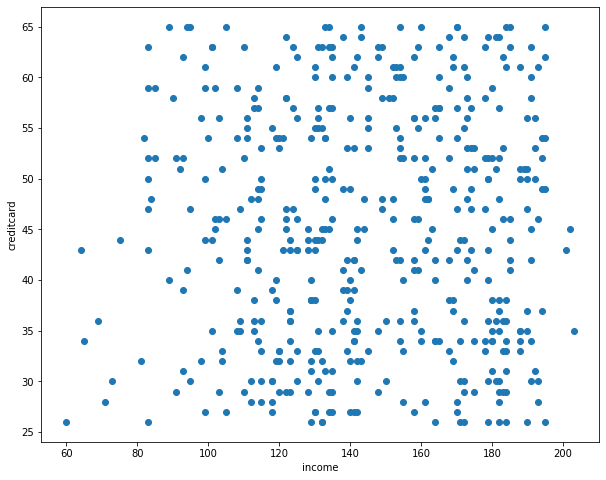

In [9]:
fig, ax = plt.subplots(figsize= (10,8))
plt.scatter(bank['Income'], bank['Age'])
plt.xlabel('income')
plt.ylabel('creditcard')

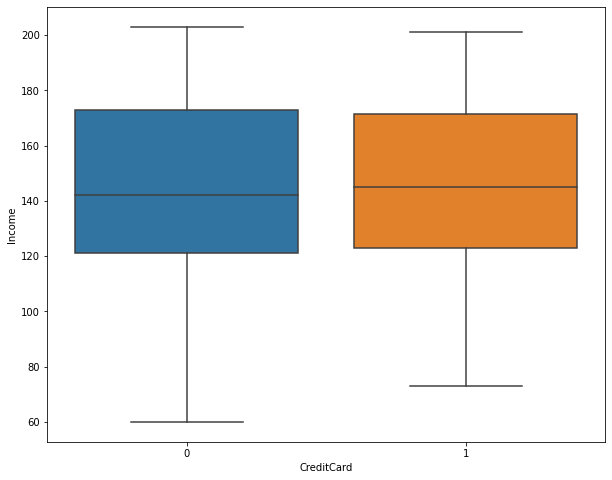

In [10]:
fig, ax = plt.subplots(figsize= (10,8))
sns.boxplot(bank['CreditCard'], bank['Income'])

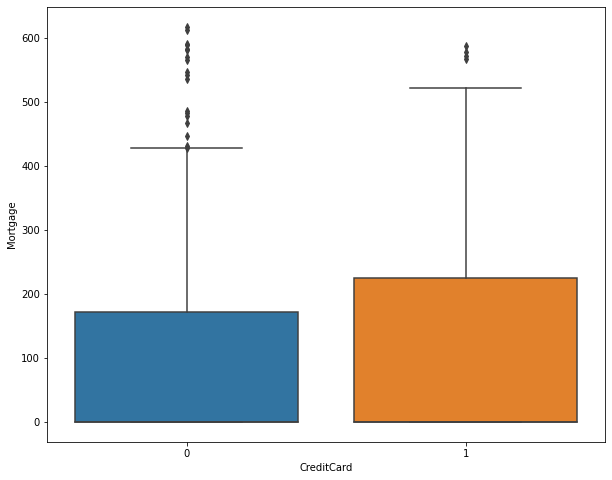

In [11]:
fig, ax = plt.subplots(figsize= (10,8))
sns.boxplot(bank['CreditCard'], bank['Mortgage'])

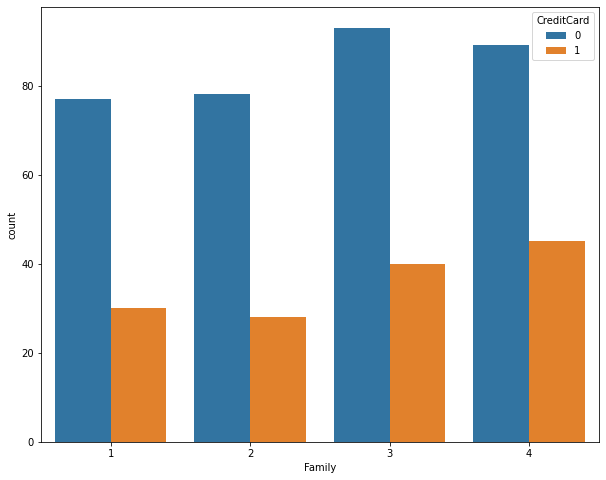

In [12]:
fig, ax = plt.subplots(figsize= (10,8))
sns.countplot(x= 'Family', data= bank, hue= 'CreditCard')

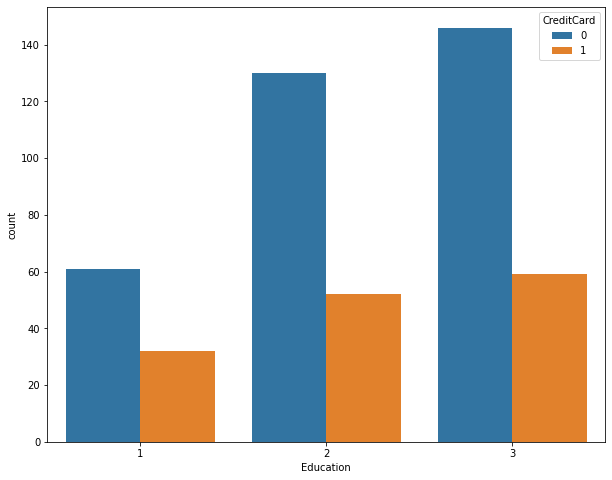

In [13]:
fig, ax = plt.subplots(figsize= (10,8))
sns.countplot(x= 'Education', data= bank, hue= 'CreditCard')

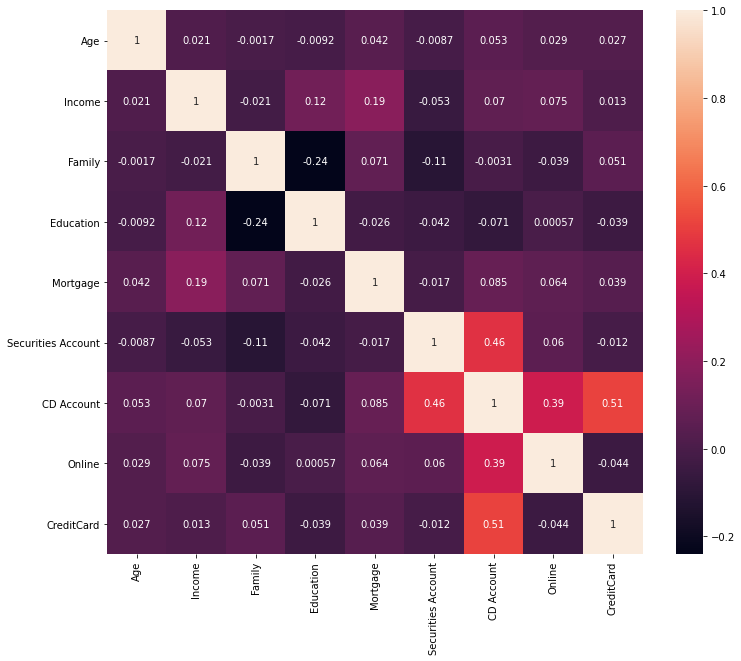

In [14]:
bank_corr = bank.corr()
fig, ax = plt.subplots(figsize= (12,10))
sns.heatmap(bank_corr, annot= True)

In [15]:
X = bank.drop('CreditCard', axis= 1)
Y = bank['CreditCard']

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2)

### hard voting

In [17]:
log_clf = LogisticRegression(C= 1, solver= 'liblinear')
svc_clf = SVC(C= 1, kernel= 'linear', gamma= 'auto')
naive_clf = GaussianNB()

In [18]:
for clf in (log_clf, svc_clf, naive_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8541666666666666
SVC 0.8333333333333334
GaussianNB 0.8229166666666666


In [19]:
voting_hard = VotingClassifier(estimators= [('lr', log_clf),
                                            ('svc', svc_clf),
                                            ('naive', naive_clf)],
                               voting= 'hard')

In [20]:
voting_hard.estimators

[('lr',
  LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('svc',
  SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)),
 ('naive', GaussianNB(priors=None, var_smoothing=1e-09))]

In [21]:
voting_hard.named_estimators

{'lr': LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                    warm_start=False),
 'svc': SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 'naive': GaussianNB(priors=None, var_smoothing=1e-09)}

In [22]:
voting_hard.fit(x_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('svc',
                              SVC(C=1, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma

In [23]:
y_pred = voting_hard.predict(x_test)
accuracy_score(y_test, y_pred)

0.8541666666666666

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.90        68
           1       0.89      0.57      0.70        28

    accuracy                           0.85        96
   macro avg       0.87      0.77      0.80        96
weighted avg       0.86      0.85      0.84        96



In [25]:
print(confusion_matrix(y_test, y_pred))

[[66  2]
 [12 16]]


In [26]:
for clf in (log_clf, svc_clf, naive_clf, voting_hard):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8541666666666666
SVC 0.8333333333333334
GaussianNB 0.8229166666666666
VotingClassifier 0.8541666666666666


### soft voting

In [27]:
y_pred_prob = log_clf.predict_proba(x_test)
y_pred_prob[:10]

array([[0.20790726, 0.79209274],
       [0.72295846, 0.27704154],
       [0.23840131, 0.76159869],
       [0.27898897, 0.72101103],
       [0.94314093, 0.05685907],
       [0.71127045, 0.28872955],
       [0.94599238, 0.05400762],
       [0.73678195, 0.26321805],
       [0.23075109, 0.76924891],
       [0.70775175, 0.29224825]])

In [28]:
y_pred_prob = naive_clf.predict_proba(x_test)
y_pred_prob[:10]

array([[0.25106257, 0.74893743],
       [0.81673539, 0.18326461],
       [0.13084343, 0.86915657],
       [0.31649863, 0.68350137],
       [0.84723739, 0.15276261],
       [0.84569378, 0.15430622],
       [0.90499956, 0.09500044],
       [0.87187216, 0.12812784],
       [0.22693319, 0.77306681],
       [0.84618773, 0.15381227]])

In [32]:
svc_soft_clf = SVC(C= 1, kernel= 'linear', gamma= 'auto', probability= True)

In [33]:
voting_soft = VotingClassifier(estimators= [('lr', log_clf),
                                            ('svc', svc_soft_clf),
                                            ('naive', naive_clf)],
                               voting= 'soft',
                               weights= [0.40, 0.30, 0.30])

In [34]:
for clf in (log_clf, svc_soft_clf, naive_clf, voting_soft):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8541666666666666
SVC 0.8333333333333334
GaussianNB 0.8229166666666666
VotingClassifier 0.8541666666666666
